### 09-1 순차 데이터와 순환 신경망

### 순차 데이터
- 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
- 피드포워드 신경망: 입력 데이터의 흐름이 앞으로만 전달되는 신경망

### 순환 신경망
- 뉴런의 출력을 다시 자기 자신으로 전달 - 어떤 샘플을 처리 할 때 바로 이전에 사용했던 데이터 재사용
- 타임스텝: 순환 신경망에서는 이전 샘플에 대한 기억을 가지고 있다.
- 셀: 순환 신경망에서 층을 부르는 이름
- 은닉 상태: 셀의 출력

### 09-2 순환 신경망으로 IMDB 리뷰 분류하기

### IMDB 리뷰 데이터셋
- 자연어 처리: 컴퓨터를 사용해 인간의 언어를 처리
- 말뭉치: 훈련 데이터
- 토큰: 분리된 단어
- 어휘 사전: 훈련 세트에서 고유한 단어를 뽑아 만든 목록

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300) # 가장 자주 등장하는 단어 300개

In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
print(len(train_input[0])) # 첫번째 리뷰의 길이 218개의 토큰

218


In [8]:
print(train_input[0]) # 이미 정수로 변환

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
print(train_target[:20]) # 0:부정, 1:긍정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [10]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2,
                                                                    random_state=42)

In [11]:
# 각 리뷰의 길이를 계산
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [14]:
print(np.mean(lengths), np.median(lengths)) # 평균 단어 개수 239, 중앙값 178 보아서 데이터가 한쪽에 치우쳐 있음

239.00925 178.0


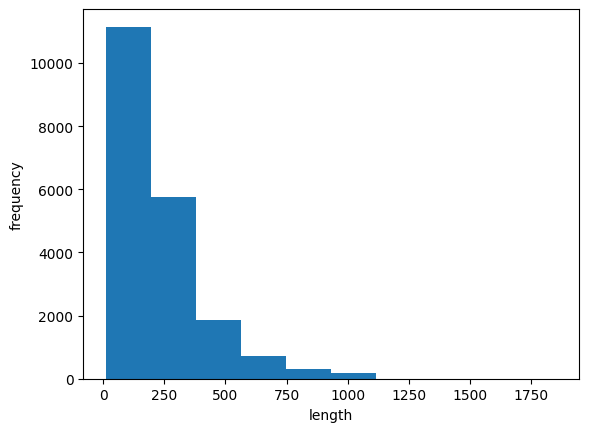

In [15]:
# 시각화를 통해 확인 - 대분 리뷰 길이는 300미만
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [16]:
# 데이터 길이 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [17]:
print(train_seq.shape)

(20000, 100)


In [18]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [19]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [20]:
# 샘플의 길이가 100이 안되면 0이 있음
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [21]:
val_seq = pad_sequences(val_input, maxlen=100)

### 순환 신경망 만들기

In [22]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300))) # 단어 길이, load_data에 불러올때 우리는 300으로 불러옴
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
train_oh = keras.utils.to_categorical(train_seq)

In [24]:
print(train_oh.shape)

(20000, 100, 300)


In [25]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [26]:
# 나머지 원소는 모두 0일까
print(np.sum(train_oh[0][0]))

1.0


In [27]:
val_oh = keras.utils.to_categorical(val_seq)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 순환 신경망 훈련하기

In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data = (val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100


313/313 [==============================] - 5s 13ms/step - loss: 0.6891 - accuracy: 0.5357 - val_loss: 0.6778 - val_accuracy: 0.5728
Epoch 2/100
 19/313 [>.............................] - ETA: 2s - loss: 0.6698 - accuracy: 0.6012

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.6324 - accuracy: 0.6538 - val_loss: 0.5816 - val_accuracy: 0.7228
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5641 - accuracy: 0.7200 - val_loss: 0.5683 - val_accuracy: 0.7092
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5358 - accuracy: 0.7376 - val_loss: 0.5325 - val_accuracy: 0.7460
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5244 - accuracy: 0.7485 - val_loss: 0.5548 - val_accuracy: 0.7190
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5169 - accuracy: 0.7519 - val_loss: 0.5201 - val_accuracy: 0.7490
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5120 - accuracy: 0.7578 - val_loss: 0.5127 - val_accuracy: 0.7542
Epoch 8/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5068 - accuracy: 0.7579 - val_loss: 0.5250 - val_accuracy: 0.7368
Epoc

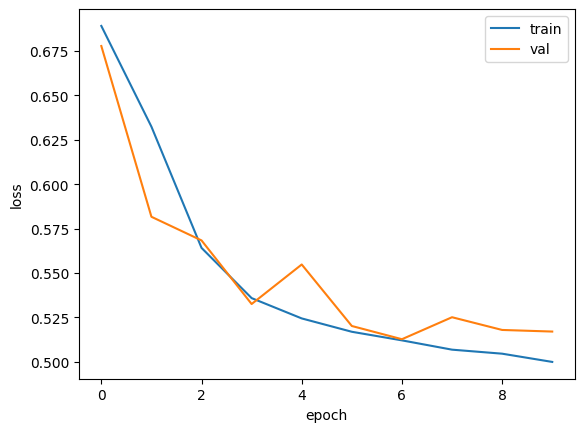

In [30]:
# 훈련 손실과 검증 손실 그래프로 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
# 원-핫 인코딩 단점은 입력 데이터가 커짐
print(train_seq.nbytes, train_oh.nbytes) # 300배 커짐 - 다른 방법 생각

8000000 2400000000


### 단어 임베딩을 사용하기
- 각 단어를 고정된 크기의 실수 벡터로 바꾼다.

In [32]:
# 임베딩을 추가한 순환 신경망
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(300, 16, input_length=100)) # 어휘 사전 크기, 임베딩 벡터 크기, 입력 시퀀스 길이
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6871 - accuracy: 0.5377 - val_loss: 0.6375 - val_accuracy: 0.6436
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6319 - accuracy: 0.6349

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 11ms/step - loss: 0.5744 - accuracy: 0.7042 - val_loss: 0.5547 - val_accuracy: 0.7226
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5386 - accuracy: 0.7370 - val_loss: 0.5852 - val_accuracy: 0.6992
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5235 - accuracy: 0.7445 - val_loss: 0.5238 - val_accuracy: 0.7456
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5111 - accuracy: 0.7540 - val_loss: 0.5516 - val_accuracy: 0.7234
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5023 - accuracy: 0.7628 - val_loss: 0.5215 - val_accuracy: 0.7502
Epoch 7/100
313/313 [==============================] - 4s 11ms/step - loss: 0.4984 - accuracy: 0.7628 - val_loss: 0.5105 - val_accuracy: 0.7534
Epoch 8/100
313/313 [==============================] - 3s 10ms/step - loss: 0.4898 - accuracy: 0.7679 - val_loss: 0.5188 - val_accuracy: 0.7496
Epoc

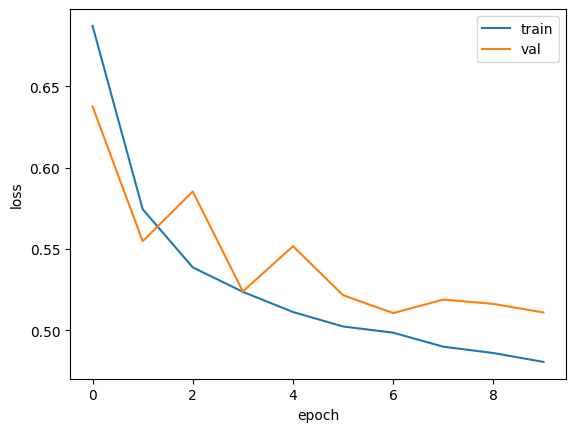

In [35]:
# 훈련 손실과 검증 손실 그래프로 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 09-3 LSTM과 GRU 셀

### LSTM 구조
- Long Short-Term Memory 약자 - 단기 기억을 오래 기억하기 위해 고안

### LSTM 신경망 훈련하기

In [36]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2,
                                                                    random_state=42)

In [37]:
# 샘플의 길이 100에 맞추고 부족할때는 패딩을 추가
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [38]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 20ms/step - loss: 0.6927 - accuracy: 0.5350 - val_loss: 0.6920 - val_accuracy: 0.5614
Epoch 2/100
 11/313 [>.............................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5923

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 18ms/step - loss: 0.6912 - accuracy: 0.5804 - val_loss: 0.6903 - val_accuracy: 0.5914
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6885 - accuracy: 0.6157 - val_loss: 0.6865 - val_accuracy: 0.6180
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6826 - accuracy: 0.6363 - val_loss: 0.6778 - val_accuracy: 0.6476
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6668 - accuracy: 0.6646 - val_loss: 0.6511 - val_accuracy: 0.6782
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6167 - accuracy: 0.7096 - val_loss: 0.5887 - val_accuracy: 0.7210
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5700 - accuracy: 0.7370 - val_loss: 0.5623 - val_accuracy: 0.7344
Epoch 8/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5485 - accuracy: 0.7483 - val_loss: 0.5446 - val_accuracy: 0.7476
Epoc

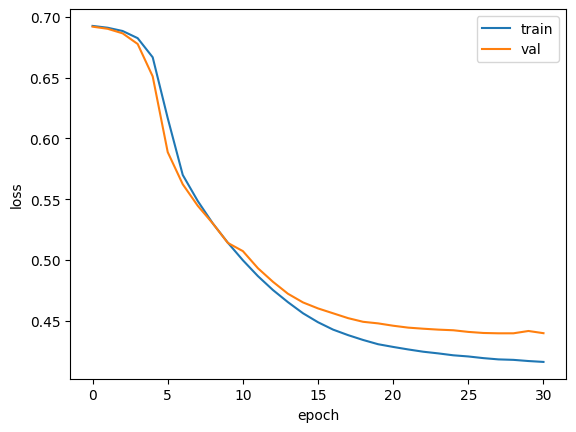

In [41]:
# 훈련 손실과 검증 손실 그래프로 비교
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 순환층에 드롭아웃 적용하기

In [42]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [43]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6924 - val_accuracy: 0.5368
Epoch 2/100
  7/313 [..............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5558

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 19ms/step - loss: 0.6914 - accuracy: 0.5727 - val_loss: 0.6910 - val_accuracy: 0.5788
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6895 - accuracy: 0.5997 - val_loss: 0.6884 - val_accuracy: 0.6080
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6857 - accuracy: 0.6284 - val_loss: 0.6833 - val_accuracy: 0.6294
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6772 - accuracy: 0.6495 - val_loss: 0.6703 - val_accuracy: 0.6670
Epoch 6/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6450 - accuracy: 0.6869 - val_loss: 0.6075 - val_accuracy: 0.7044
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5894 - accuracy: 0.7078 - val_loss: 0.5771 - val_accuracy: 0.7168
Epoch 8/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5651 - accuracy: 0.7282 - val_loss: 0.5552 - val_accuracy: 0.7360
Epoc

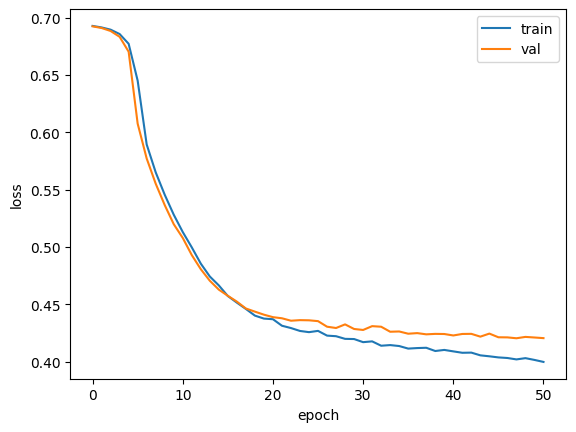

In [44]:
# 훈련 손실과 검증 손실 그래프로 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 2개의 층을 연결하기

In [45]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [46]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 35ms/step - loss: 0.6928 - accuracy: 0.5150 - val_loss: 0.6925 - val_accuracy: 0.5174
Epoch 2/100
  5/313 [..............................] - ETA: 10s - loss: 0.6924 - accuracy: 0.5594

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 10s 33ms/step - loss: 0.6912 - accuracy: 0.5722 - val_loss: 0.6895 - val_accuracy: 0.5726
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6792 - accuracy: 0.6321 - val_loss: 0.6569 - val_accuracy: 0.6806
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6068 - accuracy: 0.6899 - val_loss: 0.5680 - val_accuracy: 0.7170
Epoch 5/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5506 - accuracy: 0.7290 - val_loss: 0.5269 - val_accuracy: 0.7450
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5205 - accuracy: 0.7498 - val_loss: 0.5041 - val_accuracy: 0.7594
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.4989 - accuracy: 0.7653 - val_loss: 0.4839 - val_accuracy: 0.7716
Epoch 8/100
313/313 [==============================] - 12s 37ms/step - loss: 0.4852 - accuracy: 0.7720 - val_loss: 0.4755 - val_accuracy: 0.77

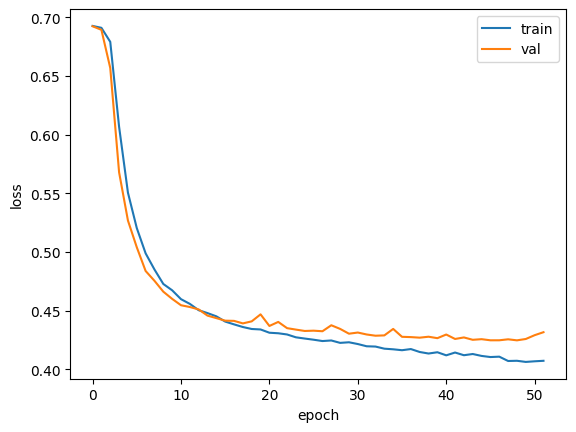

In [48]:
# 훈련 손실과 검증 손실 그래프로 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### GRU 구조
- Gated Recurrent Unit - LSTM 간소화한 버전 이 셀은 LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함

### GRU 신경망 훈련하기

In [51]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [52]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6928 - accuracy: 0.5148 - val_loss: 0.6927 - val_accuracy: 0.5268
Epoch 2/100
 10/313 [..............................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5234

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 18ms/step - loss: 0.6921 - accuracy: 0.5452 - val_loss: 0.6921 - val_accuracy: 0.5546
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6913 - accuracy: 0.5604 - val_loss: 0.6912 - val_accuracy: 0.5582
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6900 - accuracy: 0.5702 - val_loss: 0.6899 - val_accuracy: 0.5636
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6883 - accuracy: 0.5804 - val_loss: 0.6881 - val_accuracy: 0.5664
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6859 - accuracy: 0.5863 - val_loss: 0.6855 - val_accuracy: 0.5770
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6824 - accuracy: 0.5918 - val_loss: 0.6821 - val_accuracy: 0.5732
Epoch 8/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6778 - accuracy: 0.5994 - val_loss: 0.6774 - val_accuracy: 0.5790
Epoc

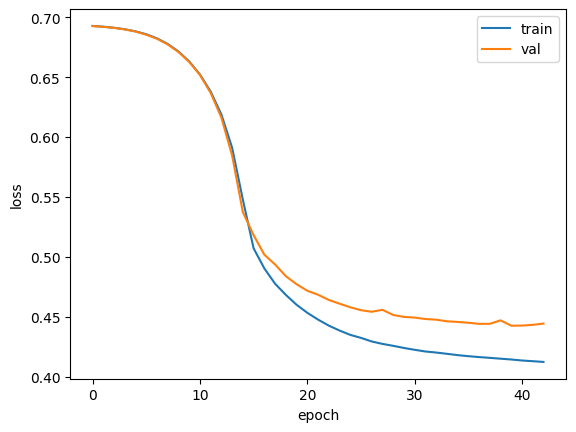

In [54]:
# 훈련 손실과 검증 손실 그래프로 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### LSTM과 GRU 셀로 훈련

In [55]:
# 가장 좋았던 2개의 순환층을 쌓은 모델 다시 로드
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 7ms/step - loss: 0.4216 - accuracy: 0.8036


[0.42161574959754944, 0.8035600185394287]